# Inference

### Importing Libraries

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from custom_metrics import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [ ]:
model_dir = 'runs/run_8/ResNet50V2/dataset_1/ResNet50V2_dataset_1.keras'
# Load the trained model
model = tf.keras.models.load_model(model_dir)
threshold = 0.5

### Live Video Feed

In [ ]:

# Function to put text on the frame
def put_text(frame, text, position=(10, 30), font=cv2.FONT_HERSHEY_SIMPLEX, font_scale=1, color=(0, 255, 0), thickness=2):
    cv2.putText(frame, text, position, font, font_scale, color, thickness)

# Open video capture
video_path = 'videos/8552772-hd_1920_1080_30fps.mp4'  # Replace with your video path
cap = cv2.VideoCapture(video_path)

# Ensure img_height and img_width are defined
img_height, img_width = 224, 224  # ResNet50V2 expects 224x224 images

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame
    img = cv2.resize(frame, (img_height, img_width))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)[0][0]
    label = 'Fire' if prediction < threshold else 'No Fire'
    probability = f'{(1 - prediction) * 100:.2f}%' if label == 'Fire' else f'{prediction * 100:.2f}%'

    # Put prediction text on the frame
    put_text(frame, f'{label}: {probability}', position=(10, 30))

    # Display the frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━

## Exported Video Feed

In [7]:

# Function to put text on the frame
def put_text(frame, text, position=(10, 30), font=cv2.FONT_HERSHEY_SIMPLEX, font_scale=1, color=(0, 255, 0), thickness=2):
    cv2.putText(frame, text, position, font, font_scale, color, thickness)



#### Video Spec

In [6]:
# Open video capture
video_path = 'videos/19473781-uhd_3840_2160_25fps.mp4'  # Replace with your video path
cap = cv2.VideoCapture(video_path)

# Ensure img_height and img_width are defined
img_height, img_width = 224, 224  # ResNet50V2 expects 224x224 images

In [ ]:

# Define the codec and create VideoWriter object
output_path = 'output_video/output_video.mp4'  # Replace with your desired output path
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame
    img = cv2.resize(frame, (img_height, img_width))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)[0][0]
    label = 'Fire' if prediction < threshold else 'No Fire'
    probability = f'{(1 - prediction) * 100:.2f}%' if label == 'Fire' else f'{prediction * 100:.2f}%'

    # Put prediction text on the frame
    put_text(frame, f'{label}: {probability}', position=(10, 30))

    # Write the frame to the output video
    out.write(frame)

    # Display the frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

# Batch Export Video

In [ ]:

# Function to put text on the frame
def put_text(frame, text, position=(10, 30), font=cv2.FONT_HERSHEY_SIMPLEX, font_scale=1, color=(0, 255, 0), thickness=2):
    cv2.putText(frame, text, position, font, font_scale, color, thickness)



# Ensure img_height and img_width are defined
img_height, img_width = 224, 224  # ResNet50V2 expects 224x224 images

input_videos_dir = 'videos'
output_videos_dir = 'output_videos'

# Ensure the output directory exists
os.makedirs(output_videos_dir, exist_ok=True)

# Iterate over all video files in the input directory
for video_file in os.listdir(input_videos_dir):
    input_video_path = os.path.join(input_videos_dir, video_file)
    output_video_path = os.path.join(output_videos_dir, f'output_{video_file}')

    # Open video capture
    cap = cv2.VideoCapture(input_video_path)

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Preprocess the frame
        img = cv2.resize(frame, (img_height, img_width))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Make prediction
        prediction = model.predict(img_array)[0][0]
        label = 'Fire' if prediction < threshold else 'No Fire'
        probability = f'{(1 - prediction) * 100:.2f}%' if label == 'Fire' else f'{prediction * 100:.2f}%'

        # Put prediction text on the frame
        put_text(frame, f'{label}: {probability}', position=(10, 30))

        # Write the frame to the output video
        out.write(frame)

    cap.release()
    out.release()

cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━

In [ ]:
def classify_image(image_path, model, img_height, img_width):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)[0][0]
    label = 'Fire' if prediction < 0.5 else 'No Fire'
    probability = f'{(1 - prediction) * 100:.2f}%' if label == 'Fire' else f'{prediction * 100:.2f}%'

    return label, probability

# Example usage
image_path = 'images/nofire/download (3).jpeg' 
label, probability = classify_image(image_path, model, img_height, img_width)
print(f'Label: {label}, Prediction: {probability}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Label: Fire, Probability: 57.35%


In [6]:
batch_size = 32
img_height, img_width = 224, 224  # ResNet50V2 expects 224x224 images

test_dir = os.path.join("test_combined")

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False
)

# Function to create a tf.data.Dataset from ImageDataGenerator
def create_dataset(generator):
    dataset = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None, img_height, img_width, 3], [None])
    )
    dataset = dataset.unbatch().batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

test_dataset = create_dataset(test_generator)



Found 478 images belonging to 2 classes.


In [7]:
model.evaluate(test_dataset, steps=test_generator.samples // batch_size, return_dict=True)

14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 469ms/step - accuracy: 0.8398 - auc: 0.5984 - f1_score: 0.2757 - loss: 0.4690 - precision: 0.4869 - recall: 0.5319


{'accuracy': 0.8415178656578064,
 'auc': 0.9193514585494995,
 'f1_score': 0.5746086835861206,
 'loss': 0.44215184450149536,
 'precision': 0.8888888955116272,
 'recall': 0.8389512896537781}

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
Prediction:  [[1.24154601e-03]
 [1.78370959e-04]
 [7.16055706e-02]
 [2.81882398e-02]
 [1.01207918e-03]
 [3.98480395e-08]
 [7.00570550e-03]
 [4.39143866e-01]
 [9.52686906e-01]
 [3.97123717e-04]
 [4.80542258e-05]
 [6.74019635e-01]
 [1.88807756e-01]
 [2.76434468e-04]
 [1.19928236e-05]
 [6.79657698e-01]
 [3.49599048e-02]
 [4.61048866e-03]
 [1.84115561e-04]
 [1.17329314e-01]
 [8.26318026e-01]
 [9.95606363e-01]
 [1.05824202e-01]
 [8.76795769e-01]
 [8.73859346e-01]
 [9.50043559e-01]
 [9.63430464e-01]
 [9.48785901e-01]
 [9.54194367e-01]
 [6.31780863e-01]
 [6.67151213e-01]
 [9.89507794e-01]]


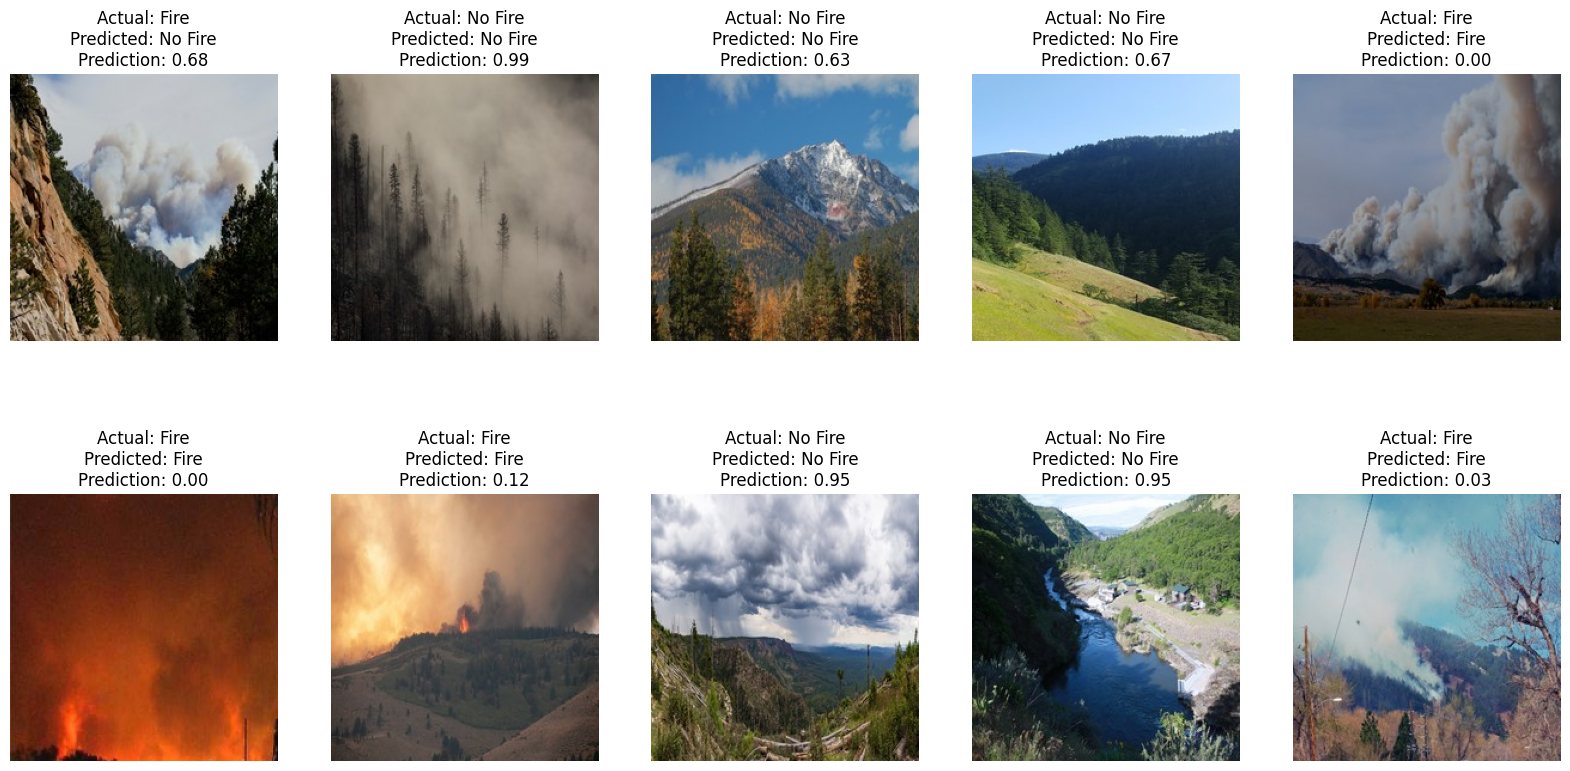

In [ ]:

while True:
    try:
        test_images, test_labels = next(test_generator)
        predictions = model.predict(test_images)

        fire_indices = np.where(test_labels == 1)[0]
        nofire_indices = np.where(test_labels == 0)[0]

        random_fire_indices = np.random.choice(fire_indices, 5, replace=False)
        random_nofire_indices = np.random.choice(nofire_indices, 5, replace=False)

        random_indices = np.concatenate((random_fire_indices, random_nofire_indices))
        np.random.shuffle(random_indices)
        # Plot the images with predictions
        plt.figure(figsize=(20, 10))
        for i, idx in enumerate(random_indices):
            plt.subplot(2, 5, i+1)
            plt.imshow(test_images[idx])
            plt.title(f"Actual: {'No Fire' if test_labels[idx] == 1 else 'Fire'}\nPredicted: {'No Fire' if predictions[idx] >= 0.5 else 'Fire'}\nPrediction: {predictions[idx][0]:.2f}")
            plt.axis('off')
        plt.show()
        break
        
    except ValueError:
        pass

In [13]:
print(model.summary())

Model: "ResNet50V2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_222 (InputLayer)    │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_110    │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1499        │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_225 (Dropout)           │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_223 (Dense)               │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1500        │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_226 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_224 (Dense)               │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,157,637 (95.97 MB)

 Trainable params: 529,409 (2.02 MB)

 Non-trainable params: 23,569,408 (89.91 MB)

 Optimizer params: 1,058,820 (4.04 MB)

None
